In [1]:
from resources.resources import *
%matplotlib inline

/Users/pataan/Dropbox/DPhil/DAPPER


## A straight-line example

Many mathematical methods are tagged with the label "least squares". They typically have one thing in common: some sum of squared terms is being minimized. Both linear regression and Kalman filtering (KF) are a form of "least squares".
Do they yield the same estimate?

Consider the straight line
$$x_k = a k \, ,    \qquad \qquad (1) $$
where $k$ is a "time index".
Now suppose we have noisy observations of it:
\begin{align*}
y_k &= x_k + \xi_k \, . \qquad \qquad (2)
\end{align*}

Linear regression minimizes
$$J_K(\alpha) = \sum_{k=1}^K (y_k - \alpha k)^2 \, ,  \qquad \qquad (4)$$
yielding the estimator
$$\alpha_K = \frac{\sum_{k=1}^K {k} y_{k}}{\sum_{k=1}^K {k}^2} \, . \qquad \qquad (6)$$

**Exc:** Derive (6) from (4).

In [2]:
#show_answer('LinReg deriv')

The KF [eqns 2.3--2.7 of the DA intro](resources/DA_intro.pdf#page=9) also constitutes an estimator. We could apply it to estimate the parameter $a$ directly, but we will instead configure it to estimate $x_k$, and thereby $a$ as $\alpha_k = x_k / k$.
In order to do so, we need to write $x_{k+1} = F_k x_k$ for some $F_k$ (which does not contain unknowns).

**Exc:** What is $F_k$?

In [4]:
#show_answer('LinReg F_k')

The code below sets up an experiment based on eqns. (1) and (2). 

In [5]:
a = 0.4  # Slope (xx[k] = a*k) paramterer. To be estimated.
K = 10   # Length of experiment (final time index)

In [6]:
Q = 0    # Dynam model noise strength
R = 1    # Observation noise strength
H = 1    # Observation operator

Generate synthetic truth (xx) and observations (yy)

In [7]:
# Note: Python indexing starts at 0.
# Convention: no obs at k==0.
xx = np.zeros(K+1) # states
yy = np.zeros(K)   # obs

for k in range(K):
    xx[k+1] = a*(k+1)
    yy[k]   = xx[k+1] + randn()

**Exc:** Program the linear regresson estimator

In [8]:
def lin_reg(k):
    ### INSERT ANSWER HERE ###
    return alpha

In [2]:
#show_answer('LinReg func')

The following implements $F_k$.

In [3]:
def F(k):
    if k==0:
        # indeterminate and inconsequential
        return 1
    else:
        # Such that xx[k+1] = a*(k+1) = F(k)*xx[k]
        return (k+1)/k
# Note that xx[k]/k is the current running estimate of the slope 'a'.

**Exc:** Implement a scalar version of the KF ([eqns 2.3--2.7 of the DA intro](resources/DA_intro.pdf#page=9) or see the exercise from [T2](T2 - Bayesian inference.ipynb#Exc-'Gaussian-Bayes':)) to estimate $x_k$ for $k=1,\ldots, K$.

In [11]:
mua = np.zeros(K+1) # mean estimates (mu) -- analysis values (a)
muf = np.zeros(K+1) # mean estimates (mu) -- forecast values (f)
PPa = np.zeros(K+1) # covar estimates (P) -- analysis values (a)
PPf = np.zeros(K+1) # covar estimates (P) -- forecast values (f)
PPa[0] = np.inf     # Set initial uncertainty to infinity

def KF(k):
    ### INSERT ANSWER HERE ###
    # Forecast
    muf[k+1] = ...
    PPf[k+1] = ...
    # Analysis
    PPa[k+1] = ...
    mua[k+1] = ...

# Run estimations/computations
for k in range(K): KF(k)

In [4]:
#show_answer('KF func')

This may seem more complicated than linear regression. But this "heavy machinery" is more general/flexible, and will pay off later.

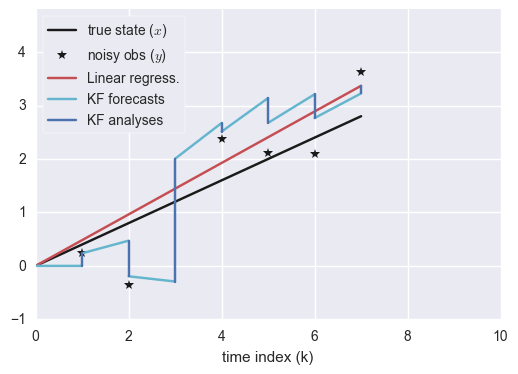

In [13]:
@interact(k=IntSlider(min=1, max=K))
def plot_experiment(k):
    plt.plot(arange(0,k+1),xx[:k+1]            ,'k' ,label='true state ($x$)')
    plt.plot(arange(1,k+1),yy[:k]              ,'k*',label='noisy obs ($y$)')
    
    #########################
    # To be replaced by exc
    #########################
    plt.plot(arange(k+1),arange(k+1)*lin_reg(k),'r' ,label='Linear regress.')
    #plt.plot(arange(k+1),arange(k+1)*mua[k]/k ,'g' ,label='KF extrapolated')
    #plt.plot(arange(k+1),mua[:k+1]                 ,label='KF (analyses only)')

    pw_muf, pw_mua = piece_wise_DA_step_lines(muf,mua)
    pw_kkf, pw_kka = piece_wise_DA_step_lines(arange(K+1))
    
    plt.plot(pw_kkf[:3*k],pw_muf[:3*k]         ,'c' ,label='KF forecasts')
    plt.plot(pw_kka[:3*k],pw_mua[:3*k]         ,'b' ,label='KF analyses')

    plt.xlim([0,K])
    plt.ylim([-1,1.2*a*K])
    plt.xlabel('time index (k)')
    plt.legend(loc='upper left')
    plt.show()

**Exc:** Visually: What is the relationship between the estimates provided by the KF and by linear regression?

In [5]:
#show_answer('LinReg plot')

**Exc:** Recall that
 * $x_k = a k = F_{k-1} x_{k-1}$,  with $F_{k-1} = \frac{k}{k-1}$,

as well as the recursive formulea of the KF:

 * (2): $\mu_k = P_k \big(y_k/R + F_{k-1} \mu_{k-1} / [F_{k-1}^2 P_{k-1}] \big) $  
 * (3): $P_k = 1/\big(1/R + 1/[F_{k-1}^2 P_{k-1}]\big)$

This excercise aims to show (on paper) that the KF estimate equals the linear regression estimate ($\alpha_K$):
$$\alpha_K = \frac{\sum_{k=1}^K {k} y_{k}}{\sum_{k=1}^K {k}^2}$$
* (a). First show that $P_K = R\frac{K^2}{\sum_{k=1}^K k^2}$   (4).
* (b). Then show that $\mu_K = K\frac{\sum_{k=1}^K k y_k}{\sum_{k=1}^K k^2} = K \alpha_K$   (5).

In [15]:
#show_answer('KF = LinReg a')

Another way to show the equivalence is to recall that the KF optimizes, recursively, for increasing $K$,

$$J(x_K) = (x_K - F \mu_{K-1})^2/Q + (y_K-x_K)^2/R \, ,$$

where $\mu_{K-1}$ is the argmin of $J(x_{K-1})$.

Letting $Q \rightarrow 0$ (and $P_0 \rightarrow \infty$)
this becomes the same problem as for linear regression:

$$J(\alpha) = \sum_{k=1}^K (y_k - \alpha k)^2 \, .$$

#### Exc 'Asymptotic P':
Consider the scalar KF equations again. Suppose $Q=0$ and that the forward model is $x_{k+1} = F x_k$, with $F>1$. Also suppose that $R_k$ is constant. What does the sequence of $P_k$ converge to?

In [16]:
#show_answer('Asymptotic P')

**Exc:** Now set $Q$ to 1 or more. What happens to the KF estimates? If you want to use the same set of observations, avoid re-executing the cell that simulated/generated them.

**Exc:** Now change $R$. The KF estimates should not change (in this particular example). Why?

## A higher-order example
Ok, so the KF produces reasonable results for straight lines (in so far as linear regression does!).
What about more intricate time series?

Note that the straight line (eqn 1 at the top) could result from discretizing the model
\begin{align*}
\frac{dx}{dt} &= \alpha \, , \\
x_0 &= 0 \, ,
\end{align*}
using `dt = 1`.
Now, instead, we're going to consider the model
$$ \frac{d^m x}{dt^m} = 0 \, .$$

This can be written as 1-st order vector (i.e. coupled system of) ODE:
$$ \frac{d x^i}{dt} = x^{i+1} \, , \quad \frac{d x^m}{dt} = 0 \, ,$$
where $i = 1,\ldots,m$ is the state vector element index.

We'll add two terms to this model: (1) damping $\beta x^i$, with $\beta < 0$ and (2) noise $\frac{d w^i}{dt}$. Thus,
$$ \frac{d x^i}{dt} = \beta x^i + x^{i+1} + \frac{d w^i}{dt} \, ,$$
where $w^i$ is the noise process, and $\beta = \log(0.9)$.

Discretized, with a time step `dt=1`, this yields
$$ x^i_{k+1} = 0.9 x^i_k + x^{i+1}_k + w^i_k\, ,$$

In summary, $\mathbf{x}_{k+1} = \mathbf{F} \mathbf{x}_k$, with $\mathbf{F}$ as below.

In [17]:
m = 4 # model order (and also ndim)
F_matrix = 0.9*eye(m) + diag(ones(m-1),1)
F_matrix

array([[ 0.9,  1. ,  0. ,  0. ],
       [ 0. ,  0.9,  1. ,  0. ],
       [ 0. ,  0. ,  0.9,  1. ],
       [ 0. ,  0. ,  0. ,  0.9]])

We now have a full-fledged Kalman filtering formulation of a problem on our hands. 

We shall not write the code for a multivariate Kalman filter. It is already in DAPPER under `[DAPPER-path]/da_methods.py` and is called `ExtKF()`. The following sets up an experiment with a synthetic truth realization of the model, along with noisy observations. For now, don't worry about the specifics. We'll get back to how to make setups later.

We'll only observe the first (0th) component, so that the time series can also be analysed by simple signal processing methods.

In [18]:
# Forecast dynamics
f = linear_model_setup(F_matrix)
f['noise'] = 0.0001*arange(m)

# Initial conditions
X0 = GaussRV(m=m,C=0.02*arange(m))

# observe 0th component only
h = partial_direct_obs_setup(m,[0])
h['noise'] = 1000

# Time settings
t = Chronology(dt=1,dtObs=5,K=250)

# Wrap-up
setup = TwinSetup(f,h,t,X0)

This generates (simulates) a synthetic truth (xx) and observations (yy)

In [19]:
xx,yy = simulate(setup,desc="Simulate")
#plt.plot(xx[:,0])

Now we'll run assimilation methods on the data. The `KS` method refers to a smoother. It is based on the filter, but also goes back in time, "smoothing" out the jumps by assimilating future (relatively speaking) observations.

In [20]:
stats_KF = ExtKF (store_u=1).assimilate(setup,xx,yy)
stats_KS = ExtRTS(store_u=1).assimilate(setup,xx,yy)

The following methods perform "time series analysis" of the observations, and are mainly derived from signal processing theory.
Considering that derivatives can be approximated by differentials, it is plausible that the above model could also be written as an AR(m) process. Thus these methods should perform quite well.

In [21]:
import scipy.signal as sp_sp
normalize = lambda x: x / x.sum()
truncate  = lambda x,n: np.hstack([x[:n],zeros(len(x)-n)])
TS = {}

signal = yy[:,0]
TS['Gaussian'] = sp_sp.convolve(signal, normalize(sp.signal.gaussian(30,3)),'same')
TS['Wiener']   = sp_sp.wiener(signal)
TS['Butter']   = sp_sp.filtfilt(*sp_sp.butter(10, 0.12), signal, padlen=len(signal)//10)
TS['Spline']   = sp.interpolate.InterpolatedUnivariateSpline(t.kkObs,signal)(t.kk)
TS['Fourier']  = np.fft.irfft(truncate(np.fft.rfft(signal),len(signal)//14))
  

The following code plots the results. (The GUI is slightly buggy. It might be necessary to execute the cell multiple times.)

<IPython.core.display.Javascript object>


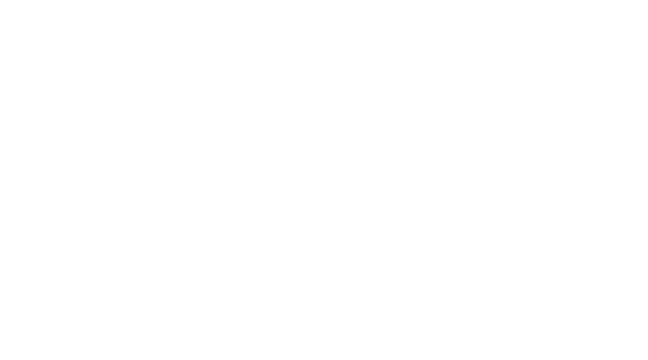

<IPython.core.display.Javascript object>


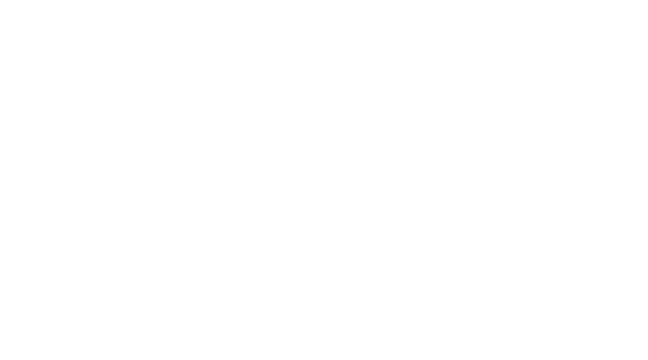

In [22]:
%matplotlib notebook

@interact(Visible=SelectMultiple(options=['Truth',
  'Kalman smoother','Kalman filter','Butter','Gaussian','Wiener','Spline','Fourier']))
def plot_results(Visible):
    plt.figure(figsize=(9,5))
    plt.plot(t.kkObs,yy,'k*',label="Obs")
    if 'Truth' in Visible:
        plt.plot(t.kk,xx[:,0],'k',label="Truth")
    if 'Kalman smoother' in Visible:
        plt.plot(t.kk,stats_KS.mu.u[:,0],'m',label="K. smoother")
    if 'Kalman filter' in Visible:
        #plt.plot(t.kkObs,stats_KF.mu.f[:,0],'b',label="K. filter (f)")
        #plt.plot(t.kkObs,stats_KF.mu.a[:,0],'c',label="K. filter (a)")
        #plt.plot(t.kk   ,stats_KF.mu.u[:,0],'c',label="K. filter")
        pw_muf, pw_mua = piece_wise_DA_step_lines(stats_KF.mu.f[:,0],stats_KF.mu.a[:,0])
        pw_kkf, pw_kka = piece_wise_DA_step_lines(t.kkObs)
        plt.plot(pw_kkf,pw_muf,'b',label="KF. forecast")
        plt.plot(pw_kka,pw_mua,'c',label="KF. analyses")
    if 'Butter' in Visible:
        plt.plot(t.kkObs,TS['Butter'],'r',label='Butter')
    if 'Gaussian' in Visible:
        plt.plot(t.kkObs,TS['Gaussian'],'g',label='Gaussian')
    if 'Wiener' in Visible:
        plt.plot(t.kkObs,TS['Wiener'],'y',label='Wiener')
    if 'Spline' in Visible:
        plt.plot(t.kk   ,TS['Spline'],'b',label='Spline')
    if 'Fourier' in Visible:
        plt.plot(t.kkObs,TS['Fourier'],'b',label='Trunc. Fourier')
    plt.legend()
    plt.show()

Visually, it's hard to imagine better performance than from the Kalman smoother.
However, recall the advantage of the Kalman filter (and smoother): they know the forecast model that generates the truth; they also know the noise levels Q and R (but they don't know the actual outcomes/realizations of the random noises), which also means that they do not need any *tuning*, or having to choose between the myriad of signal processing filters [out there](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal).

In [ ]:
def average_error(estimate_at_obs_times):
    return np.mean(np.abs(xx[t.kkObs,0] - estimate_at_obs_times))

print('Gaussian'   , average_error(TS['Gaussian']))
print('Wiener'     , average_error(TS['Wiener']))
print('Butter'     , average_error(TS['Butter']))
print('Spline'     , average_error(TS['Spline'][t.kkObs]))
print('Fourier'    , average_error(TS['Fourier']))
print('K. smoother', average_error(stats_KS.mu.u[t.kkObs,0]))
print('K. filter'  , average_error(stats_KF.mu.a[:,0]))


**Exc:** Theoretically, in the long run, the Kalman smoother should yield the best result. Verify this by increasing the experiment length to K=10**4.

**Exc:** Re-run the experiment with different paramters, for example the observation noise strength or `dkObs`.
[Results will differ even if you changed nothing because the truth noises (and obs) are stochastic.]

**Exc:** Right before executing the assimilations (but after simulating the truth and obs), change $R$ by inserting:

    setup.h.noise = GaussRV(C=0.01*eye(1))
    
What happens to the estimates of the Kalman filter and smoother?

**Exc:** Try out different DAPPER methods

"Data assimilation" (i.e. state estimation) is a lot more than "time series analysis", which is what we've been seeing so far. Indeed, [much of time series analysis can be formulated as state estimation](https://www.google.com/search?q="We+now+demonstrate+how+to+put+these+models+into+state+space+form"). Moreover, DA methods also yield uncertainty quantifications, something which is generally obscure with "time series analysis" methods.

DA really shines in the multivariate case. In part by its capacity to deal with sparsely observed systems, and in part because multivariate systems are often chaotic (which is more fun than stochastically-driven signals such as the above example). This is what we'll get to next.

### Next: [Dynamical systems, chaos, Lorenz](T4 - Dynamical systems, chaos, Lorenz.ipynb)